# Titanic Dataset Exploration

This Notebook explores the Titanic Dataset.

In [1]:
msg = "Hello World"
print(msg)

Hello World


In [3]:
# Import the pandas and numpy packages
import pandas as pd
import numpy as np

In [4]:
# Load the titanic dataset from the CSV file into a pandas dataframe
data = pd.read_csv('titanic-data/titanic3.csv')

In [5]:
# Show the top records in the dataframe
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
# Show the data types of each column
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [7]:
# Replace '?' with NaN (missing data marker)
data.replace('?', np.nan, inplace= True)

# Convert the age and fare columns to float64 data type (But it looks like it already automatically did it for us)
data = data.astype({"age": np.float64, "fare": np.float64})

In [8]:
# Import the seaborn and matplotlib packages
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

### Installed seaborn and matplotlib via Terminal
uv add seaborn matplotlib

In [9]:
# Import the seaborn and matplotlib packages
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='survived', ylabel='fare'>

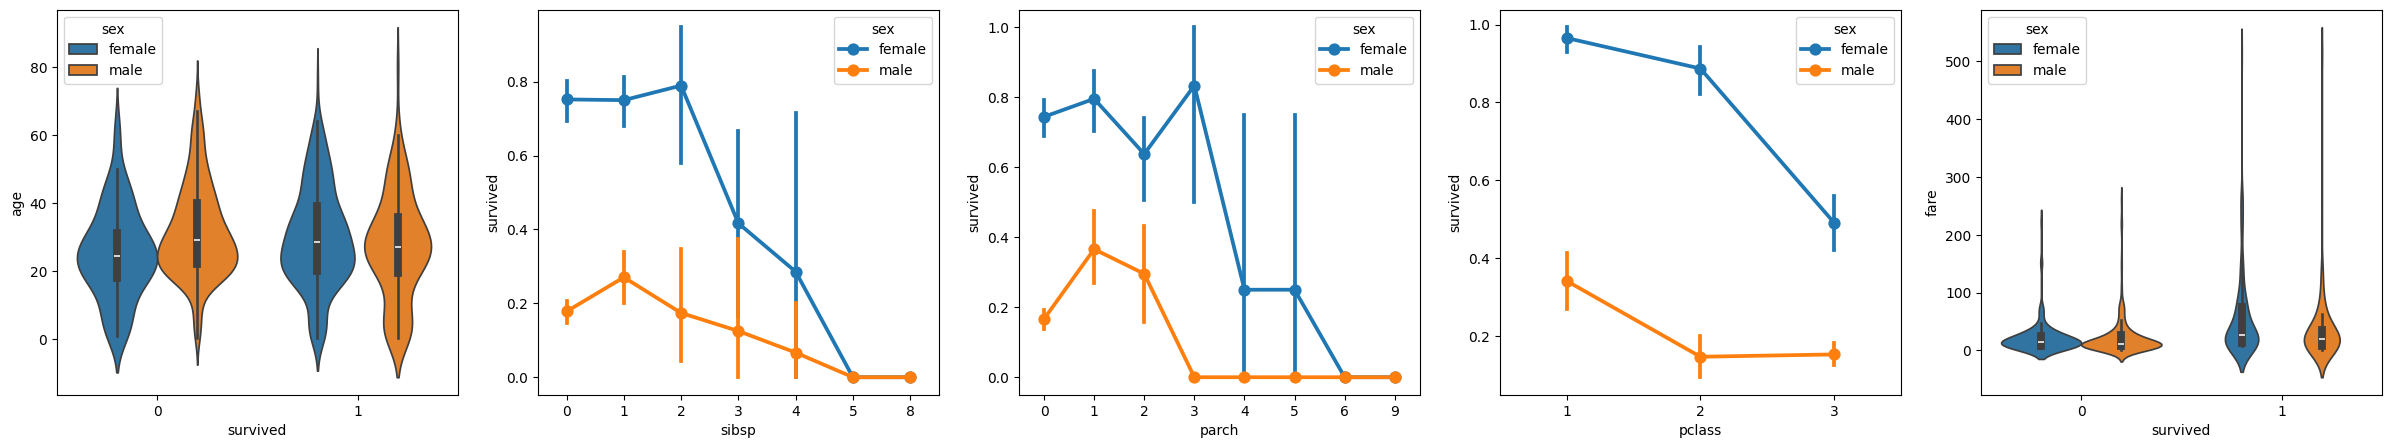

In [10]:
# Create subplots to visualize relationships between variables and survival
fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [11]:
# Map 'male' to 1 and 'female' to 0
data.replace({'male': 1, 'female': 0}, inplace=True)

C:\Users\joeso\AppData\Local\Temp\ipykernel_24408\1163180463.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'male': 1, 'female': 0}, inplace=True)


In [12]:
# Calculate the absolute correlation of all numeric columns with the 'survived' column
data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


In [13]:
# Create a new column 'relatives' that indicates if a passenger had any siblings/spouses or parents/children aboard
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719
